#REALIZA 5 PRUEBAS CON MUESTRAS DE TAMAÑO N=25 EN CADA CASO CON NIVELES DE SIGNIFICANCIA DIFERENTES PERO INFERIORES A 0,1 PARA CONFIRMAR O RECHAZAR LAS SIGUIENTES HIPOTESIS CONSIDERANDO LAS ALTERNATIVAS. CREA PARA ELLO UNA FORMULA QUE RECIBA LOS PARÁMETROS ADECUADOS Y RESPONDA: "CON NIVEL DE CONFIANZA DEL % SE ACEPTA LA HIPOTESIS NULA/ALTERNATIVA

In [112]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np

In [113]:
earnings = pd.read_csv('earnings.csv')
earnings

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,61,120.0,0,15000.0,15.0,White,18.0,18.0,18.0,6,1,2.0,0.0,0.0,82
1812,64,130.0,0,8000.0,8.0,White,12.0,12.0,12.0,1,1,1.0,7.0,7.0,33
1813,72,194.0,1,60000.0,60.0,White,12.0,12.0,12.0,2,1,2.0,0.0,0.0,50
1814,63,155.0,0,15000.0,15.0,Other,14.0,14.0,14.0,6,1,2.0,2.0,2.0,69


In [114]:
earnings.isnull().sum()

height                0
weight               27
male                  0
earn                  0
earnk                 0
ethnicity             0
education             2
mother_education    244
father_education    295
walk                  0
exercise              0
smokenow              1
tense                 1
angry                 1
age                   0
dtype: int64

In [115]:
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            1816 non-null   int64  
 1   weight            1789 non-null   float64
 2   male              1816 non-null   int64  
 3   earn              1816 non-null   float64
 4   earnk             1816 non-null   float64
 5   ethnicity         1816 non-null   object 
 6   education         1814 non-null   float64
 7   mother_education  1572 non-null   float64
 8   father_education  1521 non-null   float64
 9   walk              1816 non-null   int64  
 10  exercise          1816 non-null   int64  
 11  smokenow          1815 non-null   float64
 12  tense             1815 non-null   float64
 13  angry             1815 non-null   float64
 14  age               1816 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 212.9+ KB


In [116]:
earnings.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1816.000000,1789.000000,1816.000000,1816.000000,1816.000000,1814.000000,1572.000000,1521.000000,1816.000000,1816.000000,1815.000000,1815.000000,1815.000000,1816.000000
mean,66.568833,156.305198,0.371696,21147.296256,21.147296,13.235391,13.608779,13.652202,5.303414,3.049009,1.745455,1.421488,1.421488,42.934471
std,3.831822,34.617059,0.483391,22531.765123,22.531765,2.556638,3.219372,3.250811,2.601104,2.316385,0.435725,2.157850,2.157850,17.161672
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.250000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,56.000000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


In [117]:
earnings_cleaned = earnings[['height', 'age', 'earn']]
earnings_cleaned

,height,age,earn
0,74,45,50000.0
1,66,58,60000.0
2,64,29,30000.0
3,65,57,25000.0
4,63,91,50000.0
...,...,...,...
1811,61,82,15000.0
1812,64,33,8000.0
1813,72,50,60000.0
1814,63,69,15000.0


In [118]:
earnings_cleaned.isnull().sum()

height    0
age       0
earn      0
dtype: int64

In [119]:
earnings_cleaned.duplicated().sum()

110

In [120]:
earnings_cleaned = earnings_cleaned.drop_duplicates()

In [121]:
earnings_cleaned['height'] = earnings_cleaned['height'].astype(float)

<ipython-input-121-911b9b005d65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earnings_cleaned['height'] = earnings_cleaned['height'].astype(float)


In [122]:
earnings_cleaned['age'] = earnings_cleaned['age'].astype(float)

<ipython-input-122-8bfed6c7d4f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earnings_cleaned['age'] = earnings_cleaned['age'].astype(float)


In [123]:
earnings_cleaned['earn'] = earnings_cleaned['earn'].astype(float)

<ipython-input-123-926ca9a08e61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earnings_cleaned['earn'] = earnings_cleaned['earn'].astype(float)


In [124]:
earnings_cleaned['earn'].info()

<class 'pandas.core.series.Series'>
Index: 1706 entries, 0 to 1815
Series name: earn
Non-Null Count  Dtype  
--------------  -----  
1706 non-null   float64
dtypes: float64(1)
memory usage: 26.7 KB


In [125]:
earnings_cleaned['age'].info()

<class 'pandas.core.series.Series'>
Index: 1706 entries, 0 to 1815
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1706 non-null   float64
dtypes: float64(1)
memory usage: 26.7 KB


In [126]:
earnings_cleaned['height'].info()

<class 'pandas.core.series.Series'>
Index: 1706 entries, 0 to 1815
Series name: height
Non-Null Count  Dtype  
--------------  -----  
1706 non-null   float64
dtypes: float64(1)
memory usage: 26.7 KB


# 1)PRUEBAS DE HIPOTESIS

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

In [128]:
mean_altura = earnings_cleaned['height'].mean()
mean_altura

66.63130128956624

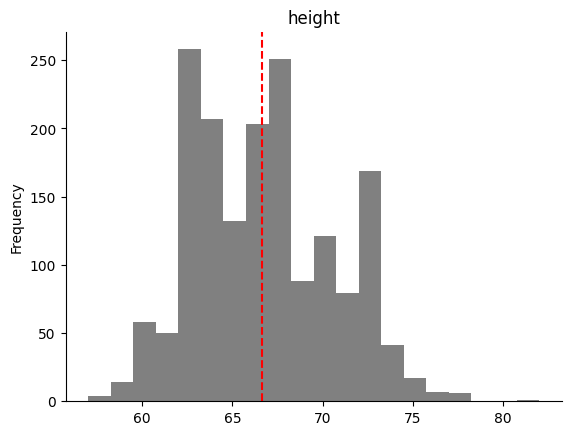

In [129]:
#Se realiza gráfico histograma de la altura incluyendo la media
from matplotlib import pyplot as plt
earnings_cleaned['height'].plot(kind='hist', bins=20, title='height', color='grey')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.axvline(earnings_cleaned['height'].mean(), color='red', ls='--')

In [130]:
def prueba_hipotesis_media(height,mu,colas): #se define la función para las pruebas de hipótesis
  datos=earnings_cleaned['height']
  datos=datos.dropna()
  alpha=round(np.random.uniform(0.01, 0.1),2)
  confianza=100*(1-alpha)
  muestra = np.random.choice(datos, 25)
  t_stat, p_value = st.ttest_1samp(muestra, mu, alternative=colas)

  # Comprobar si el valor p es menor que alfa para rechazar la hipótesis nula
  if p_value < alpha:
    if colas=='two-side':
      print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis alternativa (la media es distinta {mu})")
    if colas=='greater':
      print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis alternativa (la media es mayor que {mu})")
    if colas=='less':
      print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis alternativa (la media es menor que {mu})")
  else:
    print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis nula (la media es igual a {mu})")

  print(f"Valor t: {t_stat}")
  print(f"Valor p: {p_value}")
  print('\n')


casos={'earn':[[20000,'two-sided'],[35000,'two-sided'],[25000,'greater'],[32000,'less']],'height':[[55,'two-sided'],[68,'two-sided'],[63,'greater'],[70,'less']],'age':[[44,'two-sided'],[56,'two-sided'],[51,'greater'],[62,'less']]}


for key, values in casos.items():
    print(f"Variable: {key}")
    for value in values:
      prueba_hipotesis_media(key,value[0],value[1])


Variable: earn
Valor t: -28959.77854414987
Valor p: 4.8613951977581554e-92


Valor t: -42288.31230140651
Valor p: 5.502476611730605e-96


Con nivel de confianza de 91.0% se acepta la hipótesis nula (la media es igual a 25000)
Valor t: -35579.69485409338
Valor p: 1.0


Con nivel de confianza de 97.0% se acepta la hipótesis alternativa (la media es menor que 32000)
Valor t: -40775.52832595636
Valor p: 6.5951754519017655e-96


Variable: height
Valor t: 12.48000010322474
Valor p: 5.52571843293296e-12


Valor t: -2.1910342869777892
Valor p: 0.03839529986154152


Con nivel de confianza de 90.0% se acepta la hipótesis alternativa (la media es mayor que 63)
Valor t: 4.108030234645201
Valor p: 0.00020044519882000725


Con nivel de confianza de 97.0% se acepta la hipótesis alternativa (la media es menor que 70)
Valor t: -3.8540406733840187
Valor p: 0.00038065517008553353


Variable: age
Valor t: 27.449196643419963
Valor p: 1.224613966845542e-19


Valor t: 14.764774017033801
Valor p: 1.5309170723

#CALCULA LA MEDIA POBLACIONAL PARA CADA VARIABLE ¿SON CORRECTOS LOS NÚMEROS OBTENIDOS POR TUS PRUEBAS?

In [131]:
media = earnings_cleaned.mean()

In [132]:
# crear un intervalo de confianza del 95% para el peso medio de la población
st.t.interval (confidence= 0.95, df =len(earnings_cleaned)-1, loc = media, scale = st.sem (earnings_cleaned))

(array([   66.44742385,    42.61586235, 20569.27989723]),
 array([   66.81517873,    44.25166402, 22741.96277569]))

In [133]:
alpha=0.95
# crear un intervalo de confianza del 95% para el peso medio de la población
a,b=st.t.interval (confidence= alpha, df = len (earnings_cleaned) -1, loc = mean_altura, scale = st.sem (earnings_cleaned))
error=round(b[0]-mean_altura,2)
media_estimada=round(mean_altura,2)
conf=alpha*100
print(f'La media poblacional es {media_estimada}, con un margen de error de {error} y confiabilidad del {conf}%')

La media poblacional es 66.63, con un margen de error de 0.18 y confiabilidad del 95.0%


In [134]:
# Suponiendo que ya tienes las variables 'earnings_cleaned', 'mean_altura', y 'st.sem(earnings_cleaned)' calculadas

# Nivel de confianza (alpha)
alpha = 0.95

# Grados de libertad (df)
df = len(earnings_cleaned) - 1

# Calcular el intervalo de confianza usando la distribución t de Student
t_interval = st.t.interval(confidence=alpha, df=df, loc=mean_altura, scale=st.sem(earnings_cleaned))

# Extraer los límites inferior (a) y superior (b) del intervalo
a, b = t_interval
# Calcular el error
error = round(b[0] - mean_altura, 2)

# Calcular la media estimada
media_estimada = round(mean_altura, 2)

# Convertir el nivel de confianza a porcentaje
conf = alpha * 100

# Imprimir el resultado
print(f"La media poblacional es {media_estimada}, con un margen de error de {error} y confiabilidad del {conf}%")

La media poblacional es 66.63, con un margen de error de 0.18 y confiabilidad del 95.0%


In [135]:
mean_años = earnings_cleaned['age'].mean()
mean_años

43.4337631887456

In [136]:
# Suponiendo que ya tienes las variables 'earnings_cleaned', 'mean_años, y 'st.sem(earnings_cleaned)' calculadas

# Nivel de confianza (alpha)
alpha = 0.95

# Grados de libertad (df)
df = len(earnings_cleaned) - 1

# Calcular el intervalo de confianza usando la distribución t de Student
t_interval = st.t.interval(confidence=alpha, df=df, loc=mean_años, scale=st.sem(earnings_cleaned))

# Extraer los límites inferior (a) y superior (b) del intervalo
a, b = t_interval

# Calcular el error
error = round(b[0] - mean_años, 2)

# Calcular la media estimada
media_estimada = round(mean_años, 2)

# Convertir el nivel de confianza a porcentaje
conf = alpha * 100

# Imprimir el resultado
print(f"La media poblacional es {media_estimada}, con un margen de error de {error} y confiabilidad del {conf}%")

La media poblacional es 43.43, con un margen de error de 0.18 y confiabilidad del 95.0%


In [137]:
mean_earn = earnings_cleaned['earn'].mean()
mean_earn

21655.621336459553

In [138]:
# Suponiendo que ya tienes las variables 'earnings_cleaned', 'mean_años, y 'st.sem(earnings_cleaned)' calculadas

# Nivel de confianza (alpha)
alpha = 0.95

# Grados de libertad (df)
df = len(earnings_cleaned) - 1

# Calcular el intervalo de confianza usando la distribución t de Student
t_interval = st.t.interval(confidence=alpha, df=df, loc=mean_earn, scale=st.sem(earnings_cleaned))

# Extraer los límites inferior (a) y superior (b) del intervalo
a, b = t_interval
# Calcular el error
error = round(b[0] - mean_earn, 2)

# Calcular la media estimada
media_estimada = round(mean_earn, 2)

# Convertir el nivel de confianza a porcentaje
conf = alpha * 100

# Imprimir el resultado
print(f"La media poblacional es {media_estimada}, con un margen de error de {error} y confiabilidad del {conf}%")

La media poblacional es 21655.62, con un margen de error de 0.18 y confiabilidad del 95.0%


# 2) CREA UNA FUNCIÓN QUE ESTIME LA PROPORCIÓN DE HOMBRES EN EL DATASET, CONSIDERANDO UNA MUESTRA DE 50 INDIVIDUOS CON NIVELES DE SIGNIFICANCIA DE 0,05 Y 0,01. ESCRIBE CON PALABRAS TUS RESULTADOS, EJECUTA LA FUNCIÓN E INTERPRETA. COMPARA CON LA PROPORCIÓN REAL.

## SE VERIFICA LA CANTIDAD DE HOMBRES Y MUJERES ENTENDIENDO hombre=1, mujer=0

In [139]:
earnings.value_counts('male')

male
0    1141
1     675
Name: count, dtype: int64

In [140]:
#La siguiente función estima si la proporción de hombres en una muestra es significativamente diferente de la proporción real.
#Para estimar la proporción de hombres en el Dataset utilizaremos como variables a earnings nombre del DataFrame, mu_o: nivel de significancia ,alpha: es la probabilidad de rechazar la hipótesis nula cuando es verdadera

In [141]:
from scipy.stats import norm

In [142]:
#caso1: NIVEL DE SIGNIFICANCIA DE 0.5
def estimado_en_proporcion_hombres(earnings, mu_0=0.5, alpha=0.05):

    # Tamaño de la muestra
    total_muestra = len(earnings)

    # Contar la cantidad de hombres en la muestra
    num_hombres = np.sum(earnings['male'] == 1)

    # Proporción estimada de hombres en la muestra
    proporcion_estimada = num_hombres / total_muestra

    # Estadístico de prueba (estadístico Z)
    z = (proporcion_estimada - mu_0) / np.sqrt(mu_0 * (1 - mu_0) / total_muestra)

    # Calculamos el valor crítico
    z_critico = norm.ppf(1 - alpha/2)

    # Comparamos el estadístico de prueba con el valor crítico
    if abs(z) <= z_critico:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es consistente con la proporción real (no se rechaza la hipótesis nula)"
    else:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)"

    return resultado

resultado_prueba = estimado_en_proporcion_hombres(earnings)
print(resultado_prueba)

Con un nivel de confianza del 95.0%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)


In [143]:
#caso1: NIVEL DE SIGNIFICANCIA DE 0.1
def estimado_en_proporcion_hombres(earnings, mu_0=0.1, alpha=0.05):

    # Tamaño de la muestra
    total_muestra = len(earnings)

    # Contar la cantidad de hombres en la muestra
    num_hombres = np.sum(earnings['male'] == 1)

    # Proporción estimada de hombres en la muestra
    proporcion_estimada = num_hombres / total_muestra

    # Estadístico de prueba (estadístico Z)
    z = (proporcion_estimada - mu_0) / np.sqrt(mu_0 * (1 - mu_0) / total_muestra)

    # Calculamos el valor crítico
    z_critico = norm.ppf(1 - alpha/2)

    # Comparamos el estadístico de prueba con el valor crítico
    if abs(z) <= z_critico:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es consistente con la proporción real (no se rechaza la hipótesis nula)"
    else:
        resultado = f"Con un nivel de confianza del {100*(1-alpha)}%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)"

    return resultado

resultado_prueba = estimado_en_proporcion_hombres(earnings)
print(resultado_prueba)

Con un nivel de confianza del 95.0%, la proporción estimada de hombres es significativamente diferente de la proporción real (se rechaza la hipótesis nula)


#3) CONSIDERANDO EL DATASET COMO UNA MUESTRA VERIFICA SI EL GENERO (MALE=1 HOMBRE) INFLUYE SOBRE EL SUELDO EARN DE LAS PERSONAS. EXPLICA Y JUSTIFICA TU PROCEDIMIENTO

In [144]:
#REVISAMOS LOS DATOS
earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [145]:
# Extracción de variables de estudio, realizamos inspección previa
df = earnings[['male', 'earn']]
df


,male,earn
0,1,50000.0
1,0,60000.0
2,0,30000.0
3,0,25000.0
4,0,50000.0
...,...,...
1811,0,15000.0
1812,0,8000.0
1813,1,60000.0
1814,0,15000.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    1816 non-null   int64  
 1   earn    1816 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 28.5 KB


In [147]:
df.isnull().sum()

male    0
earn    0
dtype: int64

In [162]:
media_hombres = df[df['male'] == 1]['earn'].mean()
media_mujeres = df[df['male'] == 0]['earn'].mean()

#Se realiza una prueba t de muestras independientes para comparar las medias

t_stat, p_value = st.ttest_ind(df[df['male'] == 1]['earn'], df[df['male'] == 0]['earn'], equal_var=False)

#Se agrega el nivel de significancia (alfa)

alpha = 0.05

#Comprobación si el valor P es mayor que alfa para rechazar o no la hipótesis nula.

if p_value > alpha:
    print("Resultado: existe evidencia para aceptar la hipótesis nula")
else:
    print("Resultado: no existe evidencia para rechazar la hipótesis nula")

#Impresión de las medias de ingresos de hombres y mujeres.

print(f"Media de ingresos de hombres: {media_hombres}")
print(f"Media de ingresos de mujeres: {media_mujeres}")

# Impresión del valor T y el valor P.

print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

Resultado: No existe evidencia suficiente que permita rechazar la hipótesis nula
Media de ingresos de hombres: 30105.17925925926
Media de ingresos de mujeres: 15847.935144609992
Valor t: 11.86459381795286
Valor p: 2.7373648004575493e-30


#A PARTIR DE LO OBSERVADO EN LA COMPARACIÓN SE PUEDE CONCLUIR QUE EXISTE INCIDENCIA DE LA VARIABLE SEXO EN LOS SALARIOS